---

Airbnb Data Source: http://insideairbnb.com/

Zillow Data Source: http://www.zillow.com/research/data/

In [117]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import *
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

## c) Regression Model for Predicting Average Price using the ZHVI and Listing Metrics for NYC, LA and San Francisco.

### Let's look at the features we have from the Airbnb Data set and Zillow Data Set. Plot them against price to determine which features, or independent variables, should be used to predict price. We are looking for a linear realtionship which may have to be achieved through transformation.

In [118]:
def read_data(location):
    location = location[['zipcode', 'accommodates', 'bathrooms', 'bedrooms', 'price', 'minimum_nights',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_value']].dropna(axis = 0)
    location = location.set_index('zipcode')
    return location

** We are going to join the Zillow data and Airbnb data according to the zip code of the listing to achieve more granularilty when looking at the real estate data for each listing. **

1) We re-read the Airbnb data and create a dataframe containing information on every listing in each city. Set the index to the zip code. 

2) We then merge the real estate data and Airbnb listing data at the zipcode and asess our features.

In [119]:
austin = read_csv('austin.csv')
austin = read_data(austin)
austin['price'] = austin['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

boston = read_csv('boston.csv')
boston = read_data(boston)
boston['price'] = boston['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

dc = read_csv('dc.csv')
dc = read_data(dc)
dc['price'] = dc['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

denver = read_csv('denver.csv')
denver = read_data(denver)
denver['price'] = denver['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

la = read_csv('la.csv')
la = read_data(la)
la['price'] = la['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

nashville = read_csv('nashville.csv')
nashville = read_data(nashville)
nashville['price'] = nashville['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

nyc = read_csv('nyc.csv')
nyc = read_data(nyc)
nyc['price'] = nyc['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

portland = read_csv('portland.csv')
portland = read_data(portland)
portland['price'] = portland['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

sandiego = read_csv('sandiego.csv')
sandiego = read_data(sandiego)
sandiego['price'] = sandiego['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

seattle = read_csv('seattle.csv')
seattle = read_data(seattle)
seattle['price'] = seattle['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

sf = read_csv('sf.csv')
sf = read_data(sf)
sf['price'] = sf['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

#### The set of Zillow features that the model will use will be the Zillow Home Value Index. This are the real estate metrics with the strongest relationship to the price of the listing, and the most value in a use case.

In [120]:
#DataFrame with all listings and Airbnb features:
#df_abnb = concat([austin, boston, dc, denver, la, nashville, nyc, portland, sandiego, seattle, sf])

df_abnb = concat([austin, boston, dc, denver, la, nashville, nyc, portland, sandiego, seattle, sf])


#DataFrame with Zillow Feature: Zillow Home Value Index
ZHVI = read_csv('Zip_Zhvi_Summary_AllHomes.csv').set_index('RegionName')
ZHVI = ZHVI.ix[:,[7,11,12]]

In [168]:
df1 = merge(df_abnb, ZHVI, left_index = True, right_index = True).dropna()
df1['reviewtotal'] = (df1['review_scores_rating'] + df1['review_scores_accuracy'] + df1['review_scores_value'])

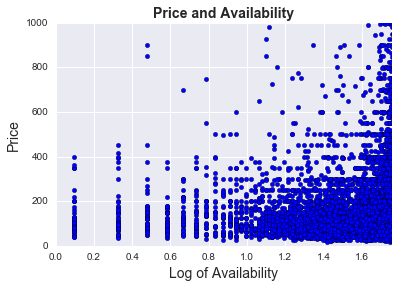

In [142]:
x = np.log(df1['availability_365'])
y = df1['price']

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.ylim(0,1000)
plt.xlim(0,1.75)

plt.xlabel('Log of Availability', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Price and Availability', fontsize=14, fontweight='bold')


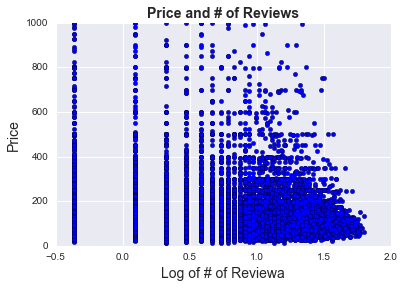

In [141]:
x = np.log(df1['number_of_reviews'])
y = df1['price']

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.ylim(0,1000)


plt.xlabel('Log of # of Reviewa', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Price and # of Reviews', fontsize=14, fontweight='bold')

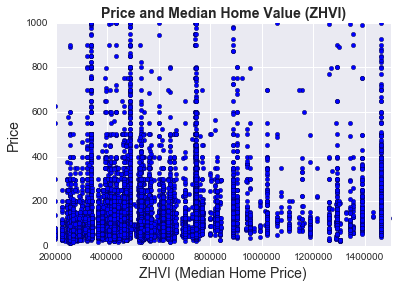

In [151]:
x = (df1['Zhvi'])
y = df1['price']

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.ylim (0,1000)
plt.xlim (200000,1500000)

plt.xlabel('ZHVI (Median Home Price)', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Price and Median Home Value (ZHVI)', fontsize=14, fontweight='bold')

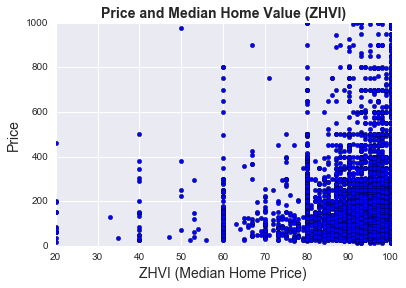

In [158]:
x = (df1['review_scores_rating'])
y = df1['price']

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.ylim (0,1000)
plt.xlim(20,100)

plt.xlabel('ZHVI (Median Home Price)', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Price and Median Home Value (ZHVI)', fontsize=14, fontweight='bold')

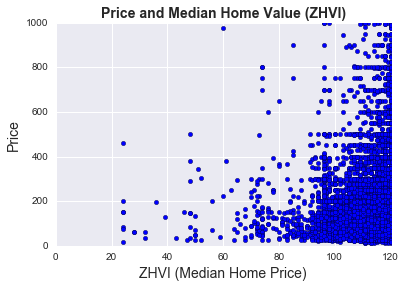

In [171]:
x = (df1['reviewtotal'])
y = df1['price']

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.ylim (0,1000)
plt.xlim(0 ,120)

plt.xlabel('ZHVI (Median Home Price)', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Price and Median Home Value (ZHVI)', fontsize=14, fontweight='bold')

In [173]:
df1 = merge(df_abnb, ZHVI, left_index = True, right_index = True).dropna()
df1['reviewtotal'] = (df1['review_scores_rating'] + df1['review_scores_accuracy'] + df1['review_scores_value'])

df1['number_of_reviews'] = np.log(df1['number_of_reviews'])
df1['availability_365'] = np.log(df1['availability_365'])
features = df1[[ 'Zhvi', 'number_of_reviews', 'availability_365', 'reviewtotal', '10Year']].replace([np.inf, -np.inf], np.nan).fillna(0)

In [174]:
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = features
Y = DataFrame(df1['price']).fillna(0)

X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size =0.2)

clf = LinearRegression()
clf.fit(X_train, Y_train)

print 'R-squared on Training Data:', r2_score(Y_train, clf.predict(X_train))
print 'R=squared on Testing Data:', r2_score(Y_test, clf.predict(X_test))

from sklearn.metrics import mean_squared_error
print 'Mean squared error on the test set: ', mean_squared_error(Y_test, clf.predict(X_test))
print 'Mean squared error on the training set: ', mean_squared_error(Y_train, clf.predict(X_train))

R-squared on Training Data: 0.0884919525091
R=squared on Testing Data: 0.093464062858
Mean squared error on the test set:  16847.7278875
Mean squared error on the training set:  17521.837105
